#### **This notebook deals with serbia campaign**

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
import os
import re

import importlib

#### packages
import helper.strategy_helper as st_hp
import helper.visualization as vz_hp
import helper.helper as hp
import helper.file_helper as file_hp
import config.config as config_hp
# import helper.twitter_helper as twitter_hp
# import helper.pandas_helper as pd_hp

#### **Load Serbia data**

In [48]:
df_serbia = pd.read_csv('serbia_022020.csv')

In [49]:
df_list = df_serbia.loc[~df_serbia['description'].isnull()]

In [50]:
df_list.drop('Unnamed: 0', axis=1, inplace=True)

/tmp/ipykernel_74541/2036400719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list.drop('Unnamed: 0', axis=1, inplace=True)


In [51]:
df_list.head()

,username,description
0,XHNews,We are public media for the public good. We do...
1,RTErdogan,Türkiye Cumhurbaşkanı ve AK Parti Genel Başkan...
2,MevlutCavusoglu,T.C. Dışişleri Bakanı / Minister of Foreign Af...
3,HashimThaciRKS,5th President of the Republic of Kosovo. Decla...
4,alajmi1955,موظف أتصالات - أحترم كل وجهات النظر- صاحب فكر ...


In [52]:
len(df_list)

963

#### **Convert target description to docx**

In [7]:
def convert_to_docx(df, 
                    columns, 
                    filename):
    '''
    Converts dataframe to docx
    :param df: Dataframe to save
    :param columns: Name of columns to use in dataframe
    :param filename: Name of file to sav
    
    :return None
    '''
    
    from docx import Document

    doc = Document()

    df = df[columns]
    for index, row in df.iterrows():
        all_text = ''
        for column in columns:
            text = row[column]
            all_text = all_text + '***' + text
            
        doc.add_paragraph(f'[{all_text}]')

    doc.save(filename)

In [15]:
len(df_list)

963

In [14]:
importlib.reload(file_hp)

file_hp.convert_to_docx(df_list,
                        ['username', 'description'],
                        './data/serbia_target_description.docx'
                       )

#### **Load english converted target description to docx**

In [16]:
def convert_docx_to_csv(filename,
                       columns,
                       save_filename,
                        to='csv'
                      ):
    '''
    Converts the docx file into dataframe. 
    This function supports only two column to save
    :param filename : Docx filename to load
    :param columns: Name of columns for dataframe
    :param save_filename: Name of the file to save as
    
    :return None
    '''
    from docx import Document

    doc = Document(filename)
    open_brac = '['
    closing_brac = ']'

    all_element = []
    print('Total data : ', len(doc.paragraphs))
    for p in doc.paragraphs:
        if p.text.strip() != "":
            element_list = (p.text).split('***')

            if len(element_list) == 1:
                continue

            element_list[0] = element_list[0].replace(open_brac, "")
            element_list[0] = element_list[0].replace(' ', "")
            element_list[1] = element_list[1].replace(closing_brac, "")

            if len(element_list) > 2:
                list_string = ' '.join(element_list[1:])
                element_list[1]  = list_string.replace('*', "")

            all_element.append([element_list[0], element_list[1]])


    df = pd.DataFrame(all_element, columns=columns)
    
    if to == 'csv':
        df.to_csv(save_filename,
                  index=False
                 )
    else:
        df.to_pickle(save_filename)
        
    print('Total data after dataframe formation: ', len(df))

In [76]:
importlib.reload(file_hp)

file_hp.convert_docx_to_csv('./data/serbia_target_english_description.docx',
                             ['username', 'english_description'],
                            './data/serbia_target_english_description.csv'
                           )

Total data :  963
Total data after dataframe formation:  963


#### **Load the annotation from chatgpt**

In [21]:
df_infered = pd.read_csv('./data/serbia_target_english_description_with_inferred_columns.csv')

In [22]:
df_infered.head()

,tweetid,english_text,Profession,Country
0,XHNews,We are public media for the public good. We do...,Journalist,Unknown
1,RTErdogan,Türkiye Kurunşabaşı ve AK Parti Genel Bünşük -...,Politician,Unknown
2,MevlutCavusoglu,TC Dışışleri Bakını / Minister of Foreign Affa...,Politician,Unknown
3,HashimThaciRKS,5th President of the Republic of Kosovo. Decla...,Politician,Kosovo
4,alajmi1955,مواصفت عتسالات - اشترام كل وجهات النظر- ساحب ف...,Unknown,Unknown


#### **Targeted tweets for Serbia**

In [1]:
config = config_hp.config()
topic_model = config['TOPIC_MODEL']

tweets = topic_model['io_target_org_tweets']

df_target_tweets = pd.read_pickle(tweets)

NameError: name 'config_hp' is not defined

In [24]:
df_target_tweets.columns

Index(['tweetid', 'text', 'lang', 'author_id', 'poster_tweetid', 'campaign'], dtype='object')

In [25]:
df_target_tweets['campaign'].unique()

array(['ira', 'sa_eg_ae_022020', 'saudi_arabia_112019', 'armenia_202012',
       'venezuela_201901', 'turkey_052020', 'russia_201901_1',
       'serbia_022020', 'egypt_022020', 'iran_201901_1', 'iran_201906',
       'china_082019', 'iranian', 'honduras_022020', 'indonesia_022020',
       'iran_202012', 'uganda_0621', 'ecuador_082019', 'egypt_uae_082019',
       'qatar_082020', 'uae_082019', 'cuba_082020', 'spain_082019',
       'china_052020', 'thailand_092020', 'ghana_nigeria_032020',
       'MX_0621', 'iran_092020', 'Venezuela_0621', 'Tanzania_0621',
       'CNHU_0621'], dtype=object)

In [26]:
df_serbia = df_target_tweets.loc[
    df_target_tweets['campaign'] == 'serbia_022020'
]

In [29]:
set(df_serbia['text'].isnull())

{False}

In [30]:
config = config_hp.config()
topic_model = config['TOPIC_MODEL']

tweets = topic_model['serbia_org_twees']

df_serbia.to_pickle(tweets)

In [33]:
df_serbia['tweetid'].nunique()

19400

In [32]:
#### Convert to docx for translation
df_serbia['tweetid'] = df_serbia['tweetid'].astype(str)

file_hp.convert_to_docx(df_serbia,
                        ['tweetid', 'text'],
                        './data/serbia_target_tweets.docx'
                       )

/tmp/ipykernel_4137489/2989397494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_serbia['tweetid'] = df_serbia['tweetid'].astype(str)


#### **Convert targeted tweets docx to dataframe**

In [34]:
importlib.reload(file_hp)

file_hp.convert_docx_to_csv('./data/serbia_target_english_tweets.docx',
                             ['tweetid', 'english_text'],
                            './data/serbia_target_english_tweets.pkl.gz',
                            to=None
                           )

Total data :  19400
Total data after dataframe formation:  19373


#### **Word clouds**

In [43]:
def get_top_hastags(df,
                    text_column,
                    n=10
                   ):
    '''
    Gets the top n hashtags from text
    :param df: Dataframe
    :param text_column: Column which has text file
    :param n: Number of hashtags to get
    
    :return dataframe
    '''
    df['hashtags'] = df[text_column].apply(
            lambda x: list(set(re.findall(r'\B\#(\w+)', x)))
        )
    df['count'] = df['hashtags'].apply(
        lambda x: len(x)
    )

    df_hasht = df.loc[df['count'] != 0]
    df_hasht = df_hasht.explode('hashtags')
    df_grp = (df_hasht
              .groupby('hashtags')
              .size()
              .to_frame('freq')
              .reset_index()
              .sort_values(by=['freq'],
                           ascending=False
                          )
             )

    return df_grp.head(n)


In [49]:
importlib.reload(hp)

df_serbia_tweets = pd.read_pickle( './data/serbia_target_english_tweets.pkl.gz')

df_hashtags = hp.get_top_hastags(df_serbia_tweets,
                text_column='english_text',
               ).head(100)

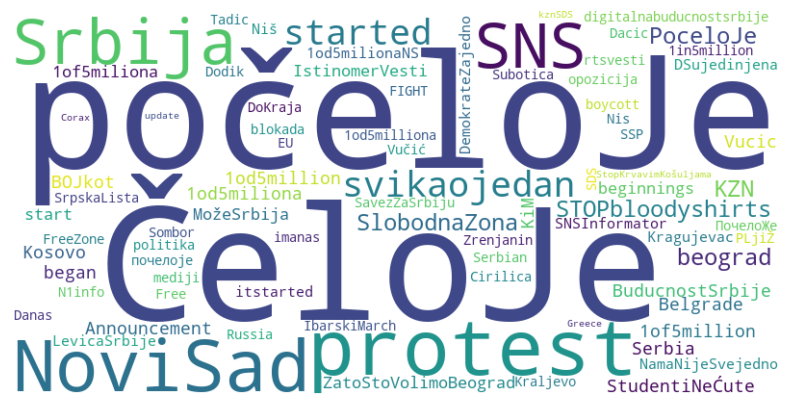

In [52]:
importlib.reload(vz_hp)

vz_hp.word_cloud(df_hashtags['hashtags'].tolist(), './plots/serbia_hastag_wordcloud.png')

[nltk_data] Downloading package stopwords to
[nltk_data]     /N/u/potem/Quartz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


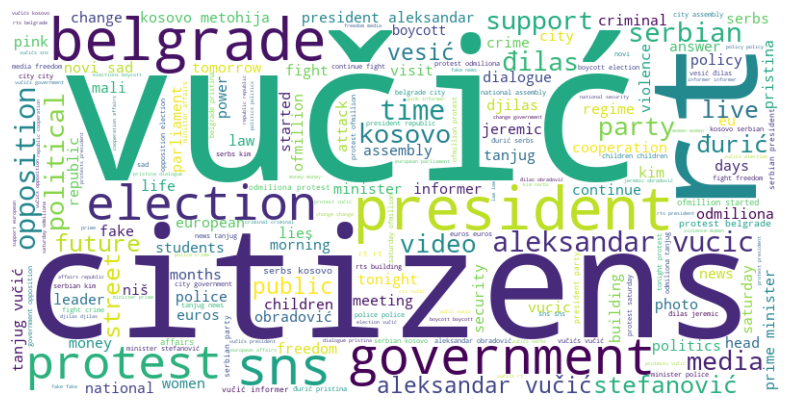

In [56]:
import helper.clean_tweet as cp_hp
importlib.reload(cp_hp)
importlib.reload(hp)

lang='en'
column='english_text'
df_words = cp_hp.preprocess_text(lang, df_serbia_tweets, column)

wordlist = hp.get_most_repeated_word(df_words, 
                                     'filtered_text',
                                     n=100,
                                    remove_word=['serbia', 'people','day', 'country']
                                    )

vz_hp.word_cloud(wordlist, './plots/serbia_frequent_word_wordcloud.png')

#### **Manual annotation**

In [121]:
import pandas as pd

def manual_annotaion(df, 
                     annotated_file,
                     description_column='english_description'
                    ):
    '''
    Loops through the dataframe for manual annotation
    :param df: Dataframe
    :param annotated_file: Filename (along with folder location) of annotated data
    '''
    all_rows = []
    limit = 10
    i = 0
    annotated_df = pd.read_pickle(annotated_file)
    annotated_df['username'] = annotated_df['username'].str.lower()

    print('Total annotated Done :', len(annotated_df))
    
    for index, row in df.iterrows():
        if row['username'] in annotated_df['username'].tolist():
            continue

        print('Username : ', row['username'])
        print('Description : ', row[description_column])
        print('Location :', row['location'])
        print('Followers count :', row['followers_count'])
        print('Following count :', row['following_count'])
        print('Verfified :', row['verified'])

        user_input = ''
        country = ''
        while user_input == '' and country == '':
            user_input = input("Type of person: ")

            print("You entered:", user_input, '****** \n')

            country = input("Country: ")

            print("You entered:", country, '****** \n')

        all_rows.append([row['username'],
                         row[description_column],
                         user_input,
                         country
                        ])
        i = i + 1
        if len(all_rows) == limit:
            i = 0
            df_ann = pd.DataFrame(all_rows, 
                                  columns=['username', 
                                           'english_description', 
                                           'type',
                                           'country'
                                          ])

            annotated_df = annotated_df.append(df_ann,
                                               ignore_index=True
                                              )
            print(annotated_df)
            annotated_df.to_pickle(annotated_file)
            all_rows = []

In [53]:
df_serbia_annot = pd.read_csv('./data/serbia_target_english_description.csv',
                             )

annotated_file = './data/serbia_022020_annotation.pkl.gz'

# (pd.DataFrame(data=None,
#               columns=['username', 
#                        'description', 
#                        'type',
#                        'country'
#                       ]
#              )
# ).to_pickle(annotated_file)

In [54]:
df_serbia_annot.columns

Index(['username', 'english_description'], dtype='object')

In [55]:
len(df_serbia_annot)

963

#### **Correction**

In [41]:
annotated_file = './data/serbia_022020_annotation.pkl.gz'

df_makeup = pd.read_pickle(annotated_file)

In [42]:
df_makeup.loc[(df_makeup['country'] == '') & (df_makeup['type'] == '')]

,username,description,type,country,english_description


In [43]:
# df_makeup.loc[(df_makeup['username'] == 'mirko_jevtic'), 'type'] = 'politician'
# df_makeup.loc[(df_makeup['username'] == 'mirko_jevtic'), 'country'] = 'serbia'
# df_makeup.loc[(df_makeup['username'] == 'ndnv'), 'type'] = 'news media'
# df_makeup.loc[(df_makeup['username'] == 'ndnv'), 'country'] = 'serbia'

In [40]:
# df_makeup.to_pickle(annotated_file)

In [44]:
len(df_makeup)

515

#### **Add location information for posters**

In [112]:
def add_poster_location(df):
    '''
    Adds the poster location information
    :param df: DataFrame
    
    :return DataFrame
    '''

    config = config_hp.config()

    poster_path = config['POSTER_PATH']

    df_tst = pd.read_pickle(poster_path['poster_info_file'])

    df_tst['username'] = df_tst['username'].str.lower()
    df['username'] = df['username'].str.lower()

    return df.merge(df_tst[['username',
                          'location',
                          'followers_count', 
                          'following_count',
                            'verified'
                         ]],
                          on='username',
                    how='left'
                         )
    
    

In [20]:
# df_tst['location'].unique()

In [22]:
pd.read_pickle(annotated_file).columns

Index(['username', 'description', 'type', 'country', 'english_description'], dtype='object')

In [23]:
df_serbia_annot.columns

Index(['username', 'english_description', 'location', 'followers_count',
       'following_count'],
      dtype='object')

In [24]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [26]:
# manual_annotaion(df_serbia_annot,
#                  annotated_file)

#### **Annotate the not description ones**

In [2]:
####### Load serbia data

df_serbia = pd.read_csv('serbia_022020.csv')

df_serbia_null = df_serbia.loc[df_serbia['description'].isnull()]

print('Total null data :', len(df_serbia_null))

config = config_hp.config()

poster_path = config['POSTER_PATH']

df_tst = pd.read_pickle(poster_path['poster_info_file'])

####### Merge for location information

df_tst['username'] = df_tst['username'].str.lower()
df_serbia_null['username'] = df_serbia_null['username'].str.lower()

df_serbia_null = df_serbia_null.merge(df_tst[['username',
                                                'location',
                                                'followers_count', 
                                                'following_count'
                                               ]],
                      on='username'
                     )

print('After merging for location :', len(df_serbia_null))

Total null data : 212


/tmp/ipykernel_74541/3122841539.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_serbia_null['username'] = df_serbia_null['username'].str.lower()


After merging for location : 212


In [3]:
df_serbia_null.columns

Index(['Unnamed: 0', 'username', 'description', 'location', 'followers_count',
       'following_count'],
      dtype='object')

In [4]:
annotated_file = './data/serbia_022020_no_description_annotation.pkl.gz'

# (pd.DataFrame(data=None,
#               columns=['username', 
#                        'description', 
#                        'type',
#                        'country',
#                       ]
#              )
# ).to_pickle(annotated_file)

In [10]:
# manual_annotaion(df_serbia_null,
#                  annotated_file,
#                  description_column='description',
#                 )

#### **Concat the two files**

In [11]:
annotated_no_file = './data/serbia_022020_no_description_annotation.pkl.gz'
annotated_file = './data/serbia_022020_annotation.pkl.gz'


df_des = pd.read_pickle(annotated_file)
df_no_des = pd.read_pickle(annotated_no_file)

In [14]:
df_des.head(1)

,username,description,type,country,english_description
0,xhnews,NaN,news media,china,We are public media for the public good. We do...


In [16]:
df_annotated_serbia = pd.concat([df_des,
                                 df_no_des],
                                 ignore_index=True
                               )

In [17]:
df_annotated_serbia.head(1)

,username,description,type,country,english_description
0,xhnews,NaN,news media,china,We are public media for the public good. We do...


In [33]:
len(df_annotated_serbia)

1056

In [90]:
df_serbia = pd.read_csv('serbia_022020.csv')

In [91]:
df_serbia.columns

Index(['Unnamed: 0', 'username', 'description'], dtype='object')

In [92]:
df_serbia.head()

,Unnamed: 0,username,description
0,2,XHNews,We are public media for the public good. We do...
1,305,RTErdogan,Türkiye Cumhurbaşkanı ve AK Parti Genel Başkan...
2,531,MevlutCavusoglu,T.C. Dışişleri Bakanı / Minister of Foreign Af...
3,1660,HashimThaciRKS,5th President of the Republic of Kosovo. Decla...
4,2117,alajmi1955,موظف أتصالات - أحترم كل وجهات النظر- صاحب فكر ...


In [93]:
len(df_serbia)

1175

In [94]:
df_serbia['username'] = df_serbia['username'].str.lower()
df_annotated_serbia['username'] = df_annotated_serbia['username'].str.lower()

In [95]:
df_final = df_serbia[['username', 
                      'description']].merge(
    df_annotated_serbia[['username', 
                         'type', 
                         'country']],
                           on= 'username'
)

In [96]:
df_final.columns

Index(['username', 'description', 'type', 'country'], dtype='object')

In [97]:
len(df_final)

1045

In [98]:
len(set(df_serbia['username']) - set(df_annotated_serbia['username']))

130

#### **Remaining**

In [99]:
remain_annotated_file = './data/serbia_022020_remaining_annotation.pkl.gz'


# (pd.DataFrame(data=None,
#               columns=['username', 
#                        'description', 
#                        'type',
#                        'country',
#                       ]
#              )
# ).to_pickle(remain_annotated_file)

In [100]:
remain_list = list(set(df_serbia['username']) - set(df_annotated_serbia['username']))

In [101]:
df_remain_serb = df_serbia.loc[df_serbia['username'].isin(remain_list)]

In [102]:
df_remain_serb.columns

Index(['Unnamed: 0', 'username', 'description'], dtype='object')

In [65]:
importlib.reload(file_hp)

file_hp.convert_to_docx(df_remain_serb,
                        ['username', 'description'],
                        './data/serbia_target_remain_description.docx'
                       )

In [75]:
importlib.reload(file_hp)

file_hp.convert_docx_to_csv('./data/serbia_target_remain_english_description.docx',
                             ['username', 'english_description'],
                            './data/serbia_target_remain_english_description.pkl.gz',
                            to=None
                           )

Total data :  130
Total data after dataframe formation:  130


In [115]:
df = pd.read_pickle('./data/serbia_target_remain_english_description.pkl.gz')

In [116]:
df.columns

Index(['username', 'english_description'], dtype='object')

In [117]:
len(df)

130

In [118]:
df = add_poster_location(df)

In [119]:
len(df)

130

In [124]:
# manual_annotaion(df,
#                  remain_annotated_file,
#                  description_column='english_description',
#                 )

#### **Append all the files**

In [131]:
annotated_no_file = './data/serbia_022020_no_description_annotation.pkl.gz'
annotated_file = './data/serbia_022020_annotation.pkl.gz'
remain_annotated_file = './data/serbia_022020_remaining_annotation.pkl.gz'

df_serbia = pd.read_csv('serbia_022020.csv')
df_des = pd.read_pickle(annotated_file)
df_no_des = pd.read_pickle(annotated_no_file)
df_remain = pd.read_pickle(remain_annotated_file)

In [128]:
df_no_des.columns

Index(['username', 'description', 'type', 'country', 'english_description'], dtype='object')

In [130]:
# df_des['description'].head()

In [132]:
df_annotated_serbia = pd.concat([df_des,
                                 df_no_des,
                                 df_remain
                                ],
                                 ignore_index=True
                               )

In [134]:
df_serbia.columns

Index(['Unnamed: 0', 'username', 'description'], dtype='object')

In [135]:
df_serbia['username'] = df_serbia['username'].str.lower()
df_annotated_serbia['username'] = df_annotated_serbia['username'].str.lower()

In [136]:
df_all = df_serbia[['username', 
                      'description']].merge(
    df_annotated_serbia[['username', 
                         'type', 
                         'country']],
                           on= 'username'
)

In [137]:
len(df_all)

1081

In [138]:
df_all.to_pickle('./data/serbia_full_annotation.pkl.gz')